<a href="https://colab.research.google.com/github/mohanvamsitrade/Complete-Python-3-Bootcamp/blob/master/spammessages_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd


'/content'

In [2]:
from google.colab import files


In [3]:
# Uploaded SMSSpamCollction data into Google Drive
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


# New Section

In [14]:
# Reading the conents in the file into a variable called "messages"
import pandas as pd
messages = [line.rstrip() for line in open('/content/drive/MyDrive/smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [15]:
# Checking the top 10 lines of conents in "messages"
for num,message in enumerate(messages[:10]):
  print(num,message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [17]:
# Using pandas to create a dataframe with all the messages and its labels
import pandas as pd
messages = pd.read_csv('/content/drive/MyDrive/smsspamcollection/SMSSpamCollection',sep = '\t', names=['labels','message'])

In [18]:
# Checking the top 5 line items in the dataframe
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Checking the summary of the dataframe created with the "messages"
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [23]:
# Creating a separate column to identify the lenght of each message to do some exploratory data analysis
messages['length'] = messages['message'].apply(len)
print(messages.head)

<bound method NDFrame.head of      labels                                            message  length
0       ham  Go until jurong point, crazy.. Available only ...     111
1       ham                      Ok lar... Joking wif u oni...      29
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3       ham  U dun say so early hor... U c already then say...      49
4       ham  Nah I don't think he goes to usf, he lives aro...      61
...     ...                                                ...     ...
5567   spam  This is the 2nd time we have tried 2 contact u...     160
5568    ham               Will ü b going to esplanade fr home?      36
5569    ham  Pity, * was in mood for that. So...any other s...      57
5570    ham  The guy did some bitching but I acted like i'd...     125
5571    ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]>


In [24]:
# Importing matplotlib and seaborn for data visualizations

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

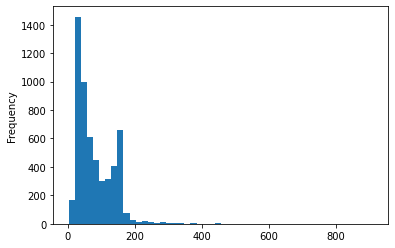

In [25]:
messages['length'].plot(bins = 50,kind ='hist')

In [26]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb270b002b0>,
      dtype=object)

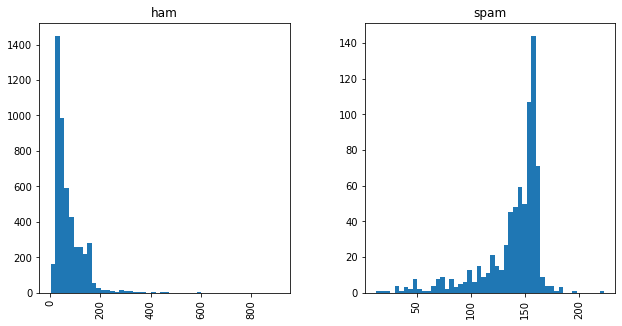

In [28]:
messages.hist(column = 'length', by='labels', bins=50, figsize=(10,5))

In [29]:
import string

In [32]:
mess = 'Sample message! Notice: It has Punctuation'

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
nopunc = [char for char in mess if char not in string.punctuation]
nopunc
nopunc = ''.join(nopunc)

In [34]:
print(nopunc)


Sample message Notice It has Punctuation


In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [37]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'Punctuation']

In [39]:
# Removing the stopwords in our message
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
clean_mess

['Sample', 'message', 'Notice', 'Punctuation']

In [50]:
#Creating a function to remove all the stopwords in text messages
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return[word for word in nopunc.split() if word.lower not in stopwords.words('english')]

In [47]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [51]:
# we wil be tokenizing these messages and create tokens
messages['message'].head(5).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [53]:
#Stemming the words in the messages.. will do it later


In [54]:
#Vectorization to be done
import sklearn

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [58]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x7fb270477d90>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [59]:
message4 = messages['message'][3]

In [60]:
print(message4)

U dun say so early hor... U c already then say...


In [61]:
bow4 = bow_transformer.transform([message4])

In [62]:
print(bow4)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [64]:
print(bow_transformer.get_feature_names()[4221])

U


In [65]:
messages_bow = bow_transformer.transform(messages['message'])

In [66]:
print('Shape of Sparse Matrix:',messages_bow.shape)
print('Amount of Non-Zero Occurance:',messages_bow.nnz)


Shape of Sparse Matrix: (5572, 11747)
Amount of Non-Zero Occurance: 79463


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [76]:
tfidf4 = tfidf_transformer.transform(bow4)

In [77]:
print(tfidf4)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [71]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [72]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [73]:
print(messages_tfidf.shape)

(5572, 11747)


In [74]:
# We wil be use Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [75]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['labels'])

In [78]:
print('Predicted:',spam_detect_model.predict(tfidf4)[0])
print('Expected:',messages['labels'][3])

Predicted: ham
Expected: ham


In [79]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [80]:
from sklearn.metrics import classification_report
print(classification_report(messages['labels'],all_predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      4825
        spam       1.00      0.79      0.88       747

    accuracy                           0.97      5572
   macro avg       0.98      0.90      0.93      5572
weighted avg       0.97      0.97      0.97      5572



In [96]:
from sklearn.model_selection import train_test_split

msg_train,msg_tst,label_train,label_test = train_test_split(messages['message'],messages['labels'],test_size=0.50)

In [97]:
print(len(msg_train),len(msg_tst),len(msg_train)+len(msg_tst))

2786 2786 5572


In [98]:
from sklearn.pipeline import Pipeline

In [99]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [100]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb270477d90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [101]:
predictions = pipeline.predict(msg_tst)

In [102]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.96      2585
        spam       0.51      1.00      0.68       201

    accuracy                           0.93      2786
   macro avg       0.76      0.96      0.82      2786
weighted avg       0.96      0.93      0.94      2786

